In [1]:
from ete3 import NCBITaxa
from Bio import Phylo
import matplotlib.pyplot as plt
from io import StringIO
import pandas as pd

In [3]:
df = pd.read_csv("org_subset.csv")
df.head()

,ncbi_id,metacyc_id,name
0,3888,TAX-3888,Pisum sativum
1,3847,TAX-3847,Glycine max
2,3880,TAX-3880,Medicago truncatula
3,1063,TAX-1063,Cereibacter sphaeroides
4,1061,TAX-1061,Rhodobacter capsulatus
5,287,TAX-287,Pseudomonas aeruginosa
6,4577,TAX-4577,Zea mays
7,4081,TAX-4081,Solanum lycopersicum
8,9606,TAX-9606,Homo sapiens
9,3708,TAX-3708,Brassica napus


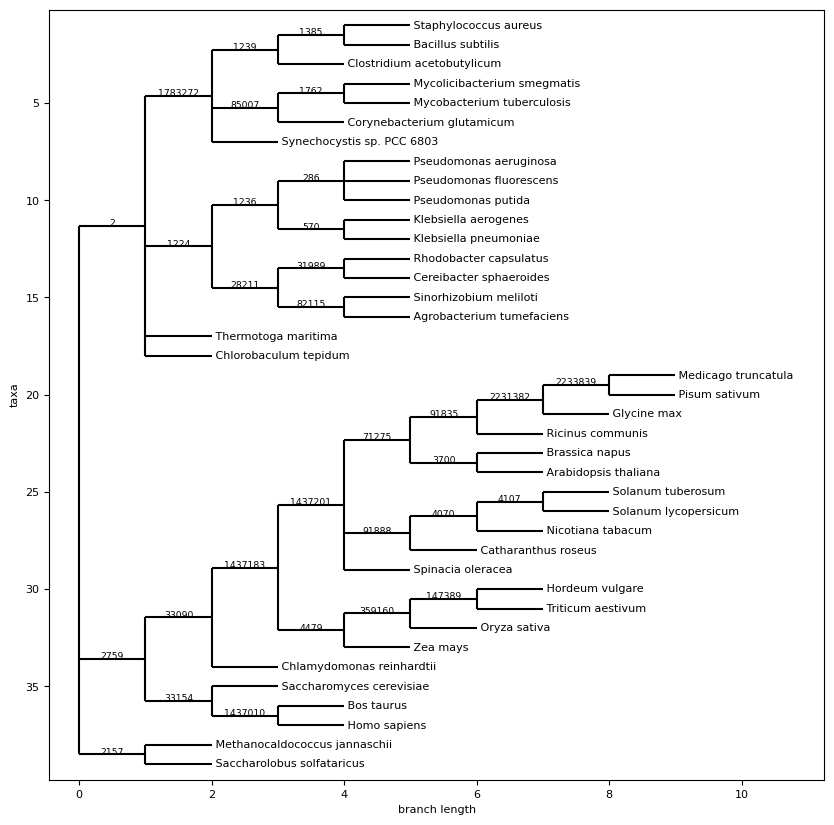

In [20]:
ncbi = NCBITaxa()
tree = ncbi.get_topology(df["ncbi_id"])

newick_str = tree.write(format=1)

tree = Phylo.read(StringIO(newick_str), "newick")

plt.rcParams['font.size'] = 8

node_names = {node: ncbi.get_taxid_translator([node.name])[int(node.name)] for node in tree.get_terminals()}

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
Phylo.draw(tree, label_func=lambda node: node_names.get(node, node.name), axes=ax, do_show=False)

plt.show()

In [4]:
for taxid in ncbi_ids:
    lineage = ncbi.get_lineage(taxid)
    names = ncbi.get_taxid_translator(lineage)
    lineage_names = [names[taxid] for taxid in lineage]
    print(f"NCBI ID: {taxid}, Lineage: {'; '.join(lineage_names)}")
    print("---")

NCBI ID: 3702, Lineage: root; cellular organisms; Eukaryota; Viridiplantae; Streptophyta; Streptophytina; Embryophyta; Tracheophyta; Euphyllophyta; Spermatophyta; Magnoliopsida; Mesangiospermae; eudicotyledons; Gunneridae; Pentapetalae; rosids; malvids; Brassicales; Brassicaceae; Camelineae; Arabidopsis; Arabidopsis thaliana
---
NCBI ID: 303, Lineage: root; cellular organisms; Bacteria; Pseudomonadota; Gammaproteobacteria; Pseudomonadales; Pseudomonadaceae; Pseudomonas; Pseudomonas putida group; Pseudomonas putida
---
NCBI ID: 216816, Lineage: root; cellular organisms; Bacteria; Terrabacteria group; Actinomycetota; Actinomycetes; Bifidobacteriales; Bifidobacteriaceae; Bifidobacterium; Bifidobacterium longum
---
NCBI ID: 9869, Lineage: root; cellular organisms; Eukaryota; Opisthokonta; Metazoa; Eumetazoa; Bilateria; Deuterostomia; Chordata; Craniata; Vertebrata; Gnathostomata; Teleostomi; Euteleostomi; Sarcopterygii; Dipnotetrapodomorpha; Tetrapoda; Amniota; Mammalia; Theria; Eutheria; 